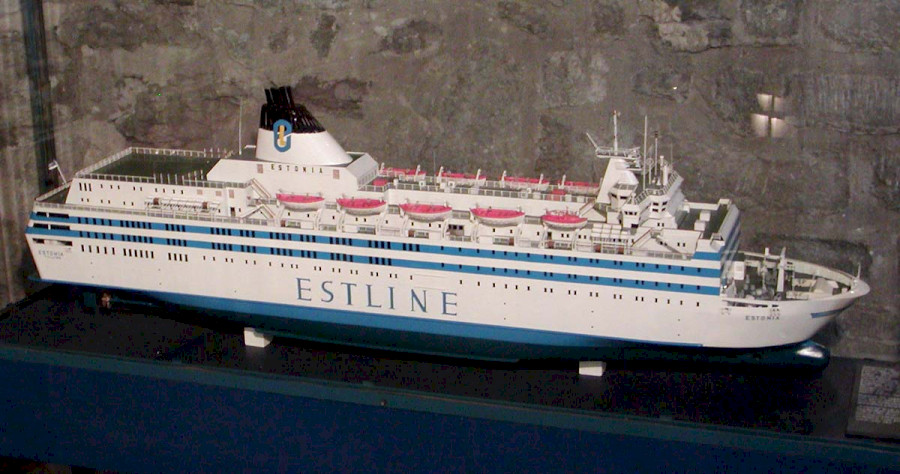



<div class="alert alert-block alert-info">

<h1>Introduction</h1>
</div>


On September 27 1994 the ferry Estonia set sail on a night voyage across the Baltic Sea from the port of Tallin in Estonia to Stockholm. She departed at 19.00 carrying 989 passengers and crew, as well as vehicles, and was due to dock at 09.30 the following morning, Tragically, the Estonia never arrived.

The weather was typically stormy for the time of year but, like all the other scheduled ferries on that day, the Estonia set off as usual. At roughly 01:00 a worrying sound of screeching metal was heard, but an immediate inspection of the bow visor showed nothing untoward. The ship suddenly listed 15 minutes later and soon alarms were sounding, including the lifeboat alarm. Shortly afterwards the Estonia rolled drastically to starboard. Those who had reached the decks had a chance of survival but those who had not were doomed as the angled corridors had become death traps. A Mayday signal was sent but power failure meant the ship’s position was given imprecisely. The Estonia disappeared from the responding ships’ radar screens at about 01:50.

The Marietta arrived at the scene at 02:12 and the first helicopter at 03:05. Of the 138 people rescued alive, one died later in hospital.

Of the 310 people who had reached the decks, almost a third died of hypothermia. The final death toll was shockingly high – more than 850 people.

An official inquiry found that failure of the locks on the bow visor, which broke away under the punishing waves, caused water to flood the car deck and quickly capsize the ship. The report also noted a lack of action, delay in sounding the alarm, lack of guidance from the bridge and a failure to light distress flares.

The sinking of the Estonia was Europe’s worst postwar maritime disaster.


<div class="alert alert-block alert-info">
<h1> Importing Libraries</h1></div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
        
import matplotlib.pyplot as plt

from seaborn import distplot
import plotly.express as px

import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py

import gc
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv


<div class="alert alert-block alert-info">
<h2>Loading the Dataset</h2></div>

In [2]:
df = pd.read_csv('/kaggle/input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv')

df.columns

Index(['PassengerId', 'Country', 'Firstname', 'Lastname', 'Sex', 'Age',
       'Category', 'Survived'],
      dtype='object')

In [3]:
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [4]:
df.tail()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0
988,989,Sweden,CARL,OVBERG,M,42,P,1


<div class="alert alert-block alert-info">
<h2>Summary Statisics</h2></div>

In [5]:
df.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


In [6]:
df.describe(include='O')

,Country,Firstname,Lastname,Sex,Category
count,989,989,989,989,989
unique,16,849,774,2,2
top,Sweden,TIINA,ANDERSSON,M,P
freq,550,8,15,503,796


<div class="alert alert-block alert-warning"><h3> Observation</h3>
    
Age with 0 ? Possibly an infant was travelling the unfortunate ship. Will look onto it in our future analysis

<div class="alert alert-block alert-info">
<h2>Shape of the dataset</h2></div>

In [7]:
df.shape

(989, 8)

<div class="alert alert-block alert-info">
<h2>Datatype</h2></div>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


<div class="alert alert-block alert-info">
<h2>Missing Value Check</h2></div>

In [9]:
df.isnull().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

<div class="alert alert-block alert-info">
<h2>Age Distribution - Passengers and Crew</h2></div>



Age Distribution using Seaborm Distribution Plot


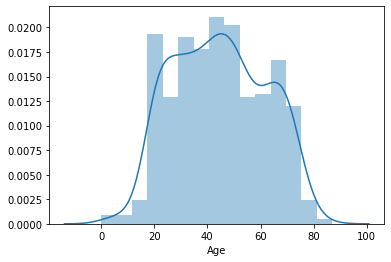

Skewness of the Age  0.06792986904254292
Kurtosis of the Age  -0.9356678278025496

 Boxplot representation of the data 



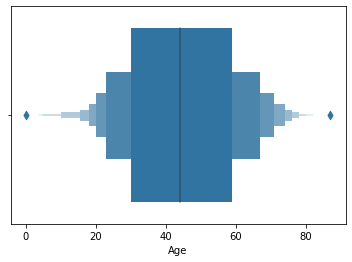

In [10]:
print('Age Distribution using Seaborm Distribution Plot')

distplot(df['Age'])
plt.show()

print('Skewness of the Age ',df['Age'].skew())
print('Kurtosis of the Age ',df['Age'].kurt())

print('\n Boxplot representation of the data \n')
sns.boxenplot(df['Age'])
plt.show()


<div class="alert alert-block alert-info">
<h2>Age Histogram</h2></div>


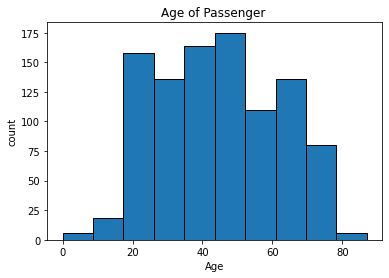

In [11]:
plt.hist(df['Age'],bins=10,edgecolor='k')
plt.title('Age of Passenger ')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

<div class="alert alert-block alert-info">
<h2>Infant Travelling?</h2></div>



 


<div class="alert alert-block alert-warning">
<h3> Observation:</h3>
From the above representation we can see age is less than 1 year. Let's find the details.

In [12]:
df[df.Age<1]

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
969,970,Estonia,KATRE,ZELMIN,F,0,P,0


<div class="alert alert-block alert-warning">
<h3> Observation:</h3>

Well yes there looks an infant was travelling with Lastname as ZELMIN. Since there was no family related information being provided, we will try to search with Lastname and the PassengerID in sequence if indeed they were family. 

In [13]:
df[df.Lastname=='ZELMIN']

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
968,969,Estonia,AIVAR,ZELMIN,M,27,P,0
969,970,Estonia,KATRE,ZELMIN,F,0,P,0
970,971,Estonia,KRETE,ZELMIN,F,2,P,0


<div class="alert alert-block alert-warning">
<h3> Observation:</h3>

From the above data, it looks like there were 2 kids from the same family with one Male accompanying and they didn't survive the accident 

<div class="alert alert-block alert-info">
<h2>Any other Family Travelling?</h2></div>


In [14]:
family_member = df[df.duplicated(subset=['Lastname'])] #AHLSTROM is one of the name
#family_member.head()
family_member[family_member.Lastname =='AHLSTROM']

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
5,6,Sweden,GERD INGA MAGNHILD,AHLSTROM,F,71,P,0
6,7,Sweden,HJALMAR,AHLSTROM,M,60,P,0


<div class="alert alert-block alert-info">
<h2>Crews from different country</h2></div>

In [15]:
df_crew = df[df.Category=='C']
df_crew = df_crew[['Country','Category']].groupby('Country').count().sort_values(by='Category',ascending=False)
df_crew.head()


,Category
Country,
Estonia,169
Sweden,15
Russia,7
Finland,2


<div class="alert alert-block alert-warning">
<h3> Observation:</h3>
    
Country with Estonia has the highest number of Crew travelling followed by Sweden

In [16]:
del(df_crew)
gc.collect()

8700



<div class="alert alert-block alert-info">
<h2>Survival Rate</h2></div>

In [17]:
#df_type = df.groupby('Survived').sum()
values = df.Survived.value_counts().values
labels = ['Death','Survived']

trace = go.Pie(values=values,labels=labels)
py.iplot([trace])

<div class="alert alert-block alert-info">
<h2> Country Wise Passengers </h2></div>


In [18]:
labels = df.Country.value_counts().index
values = df.Country.value_counts().values

fig = px.pie(df,labels=labels, values=values,title='Country wise Passenger data',names=labels,
            width=1000,height=800)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()



<div class="alert alert-block alert-info">
<h2>Genders of Estonia Ship</h2></div>


In [19]:
labels = ['Male','Female']
values = df.Sex.value_counts().values

fig = px.pie(df,labels=labels,values=values,names=labels)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<div class="alert alert-block alert-warning">
<h3> Observation</h3>
    
Ship has almost equal number of Passengers and crew.

<div class="alert alert-block alert-info">
<h2>Passengers/Crew of Origin/Country</h2></div>



In [20]:
pd.DataFrame(df['Country'].unique())

,0
0,Sweden
1,Estonia
2,Latvia
3,Russia
4,Germany
5,Finland
6,Great Britain
7,Morocco
8,Denmark
9,France


<div class="alert alert-block alert-info">
<h2>WordCloud</h2></div>


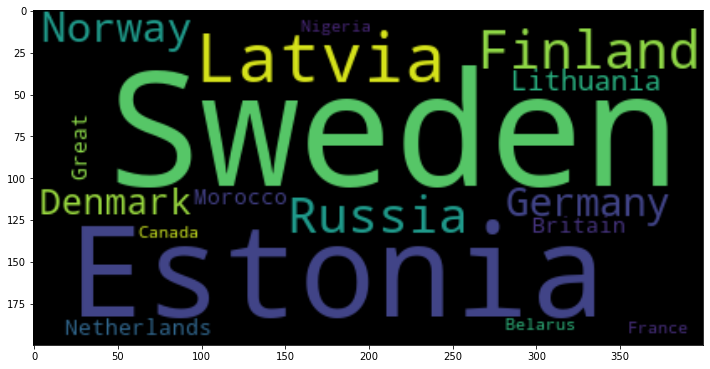

In [21]:
from wordcloud import WordCloud


plt.figure(figsize=(12,8))
wordcloud = WordCloud(collocations=False
                     ).generate_from_text('*'.join(df.Country))

plt.imshow(wordcloud,interpolation='bilinear')
plt.show()


<div class="alert alert-block alert-info">
<h2>Passenger and Crew Ratio in the Ship</h2></div>



In [22]:
labels = ['Passenger','Crew']
values = df.Category.value_counts().values

fig = px.pie(df,labels=labels,values=values,names=labels)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<div class="alert alert-block alert-info">
<h2>Survival Rate Country wise</h2></div>




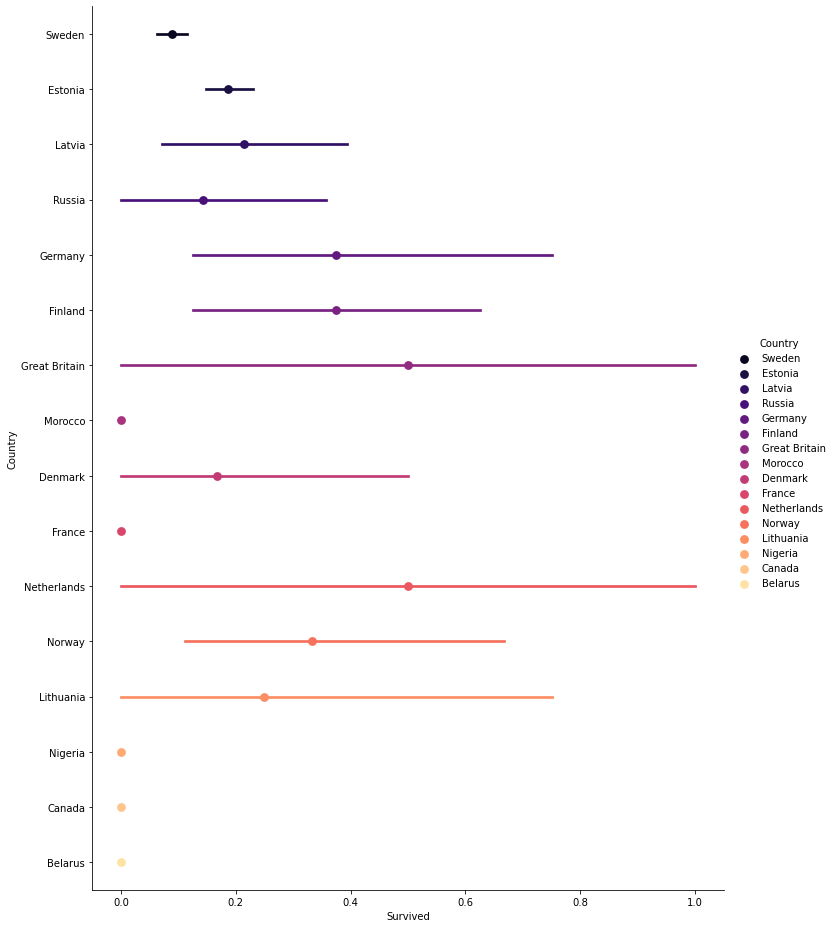

In [23]:
g = sns.factorplot('Survived','Country',data=df,
                   hue='Country',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False
              )

<div class="alert alert-block alert-info">
<h2>Survival Category V/S Age</h2></div>



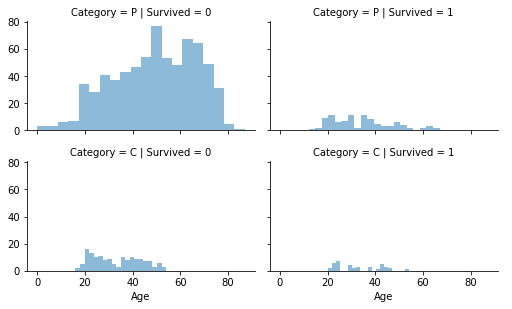

In [24]:
grid = sns.FacetGrid(df, col='Survived', row='Category', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

<div class="alert alert-block alert-info">
<h2>KDE Plot for Survival and AGE</h2></div>



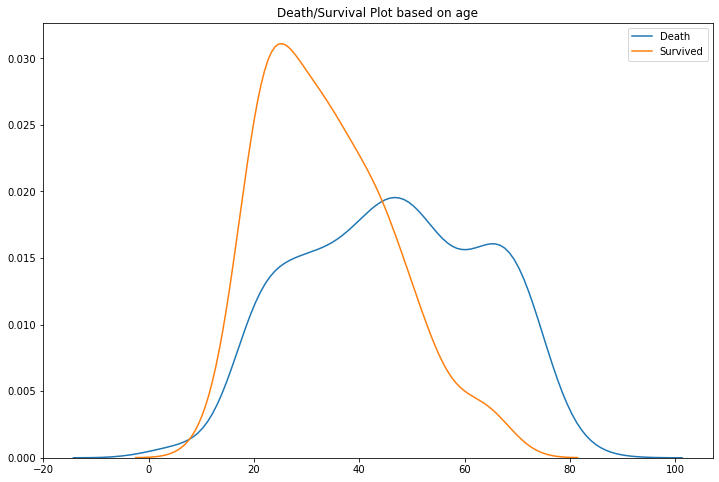

In [25]:
plt.figure(figsize=(12,8))
sns.kdeplot(df.loc[df['Survived']==0,'Age'],label = 'Death')
plt.title('Death/Survival Plot based on age')

sns.kdeplot(df.loc[df['Survived']==1,'Age'],label ='Survived' )
plt.show()

In [26]:
#Creating a different dataset for Survivor and Non Survivors


df_survivors = df[df['Survived']==1]
df_death = df[df['Survived']==0]



labels = ['Male','Female']
values = df_survivors.Category.value_counts().values

fig = px.pie(df_survivors,labels=labels,values=values,names=labels,title='Male-Female Percentage from Survivors')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

labels = ['Male','Female']
values = df_death.Category.value_counts().values
fig = px.pie(df_death,labels=labels,values=values,names=labels,title='Male-Female Percentage from Death')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<div class="alert alert-block alert-info">
<h2>Male or Female: Who has better Survival rate?</h2></div>



In [27]:
df[['Sex','Survived']].groupby('Sex').mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
M,0.218688
F,0.055556


<div class="alert alert-block alert-warning">
<h3> Observation</h3>

   
Male has higher percentage of survival as well as death than Female


<div class="alert alert-block alert-info">
<h2>Country With highest number of Survivors</h2></div>


Country with highest Survival Passenger and Crew


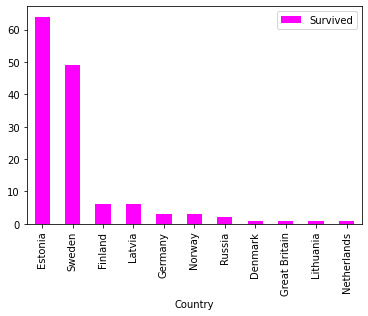


 Top 5 Country with Highest number of Survivors 
          Survived
Country          
Estonia        64
Sweden         49
Finland         6
Latvia          6
Germany         3


In [28]:
print('Country with highest Survival Passenger and Crew')
plt_survivors = df_survivors.groupby('Country')['Country','Survived'].sum().sort_values(by='Survived',ascending=False)

plt_survivors.plot(kind='bar',color='magenta')
plt.show()

print('\n Top 5 Country with Highest number of Survivors \n',plt_survivors.head())



<div class="alert alert-block alert-info">
<h2>Country with Highest Death</h2></div>


Country with highest Death Passenger and Crew


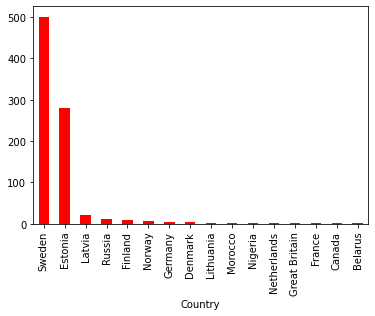


 Top 5 Country with Highest number of Death 
 Country
Sweden     501
Estonia    280
Latvia      22
Russia      12
Finland     10
Name: Survived, dtype: int64


In [29]:
print('Country with highest Death Passenger and Crew')
plt_death = df_death.groupby('Country')['Survived'].count().sort_values(ascending=False)
plt_death.plot(kind='bar',color='red')
plt.show()

print('\n Top 5 Country with Highest number of Death \n',plt_death.head())



<div class="alert alert-block alert-info">
<h2>Genderwise Survival </h2></div>



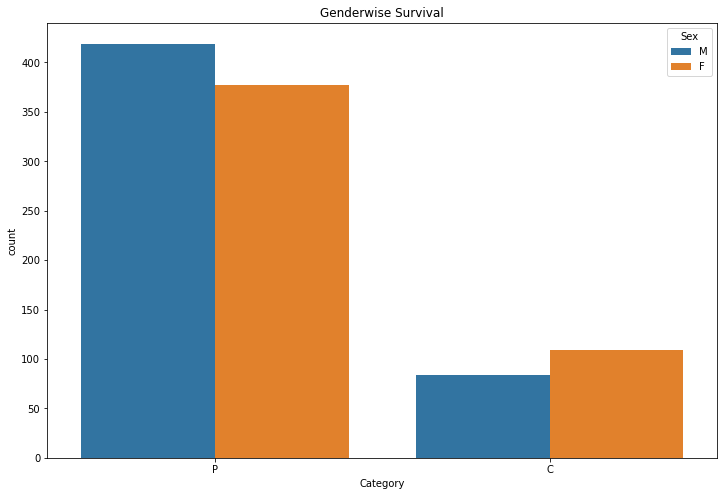

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x='Category',hue='Sex',data=df)
plt.title('Genderwise Survival')
plt.show()

<div class="alert alert-block alert-warning">
<h3> Observation:</h3>

Female Crew more likely to survive than the male Crew. Whereas Male Passenger likely have better chance of Survival than Female.

<div class="alert alert-block alert-info">
<h2>Age-Bin Survival Data Visualization</h2></div>


In [31]:
age_data = df.loc[:,['Age','Survived']]
age_data['YEARS_AGE'] = age_data.loc[:,'Age']
age_data['AGE_BAND'] = pd.cut(age_data.loc[:,'YEARS_AGE'],bins = np.linspace(20,70,num=11))

age_data.head()

,Age,Survived,YEARS_AGE,AGE_BAND
0,62,0,62,"(60.0, 65.0]"
1,22,0,22,"(20.0, 25.0]"
2,21,0,21,"(20.0, 25.0]"
3,53,0,53,"(50.0, 55.0]"
4,55,0,55,"(50.0, 55.0]"


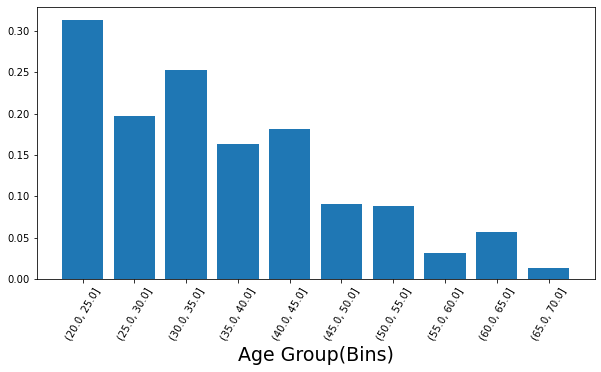

In [32]:
plt.figure(figsize=(10,5))
age_group = age_data.groupby('AGE_BAND').mean()
plt.bar(age_group.index.astype(str),age_group['Survived'])
plt.xticks(rotation=60)
plt.xlabel('Age Group(Bins)',fontsize=19)

plt.show()

<div class="alert alert-block alert-warning">
<h3> Observation:</h3>
    
There is no clear pattern, but younger people have higher death ratio than the Elderly    
    

<div class="alert alert-block alert-info">
<h2>Did the crew aboard have a higher chance of survival than passengers?</h2></div>


In [33]:
df[['Category','Survived']].groupby(['Category']).mean().sort_values(by='Survived',ascending=False)

,Survived
Category,
C,0.202073
P,0.123116


<div class="alert alert-block alert-warning">
<h3> Observation :</h3>

Yes!! The crew has better survival ratio than the Passengers. 

    
    

<div class="alert alert-block alert-info">
<h2>HeatMap</h2></div>



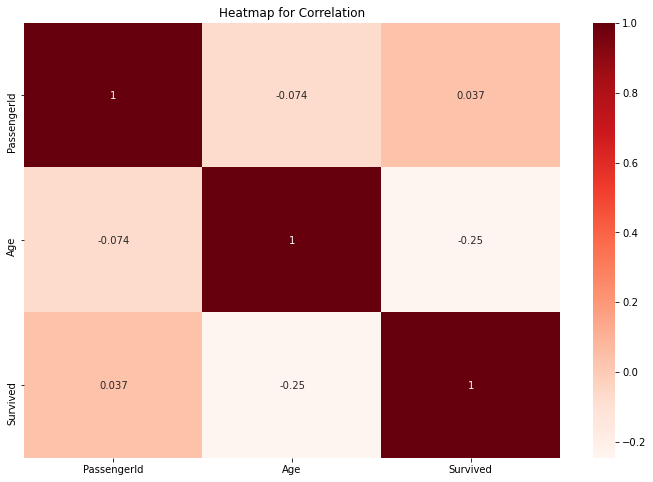

In [34]:
plt.figure(figsize=(12,8))
data = df.corr()
sns.heatmap(data,cmap='Reds',annot=True)
plt.title('Heatmap for Correlation')
plt.show()

<div class="alert alert-block alert-warning">
<h3> Observation</h3>

No much corelation between the variables.

<div class="alert alert-block alert-info">
<h2>Data Preprocessing Step</h2></div>

In [35]:
df.drop(['Country','Firstname','Lastname'],axis=1,inplace=True)

<div class="alert alert-block alert-info">
<h2>Converting Categorical to numerical</h2></div>



In [36]:
df['Sex'] = pd.get_dummies(df.Sex,drop_first=True)
df['Category'] = pd.get_dummies(df.Category,drop_first=True)

df.head()

,PassengerId,Sex,Age,Category,Survived
0,1,1,62,1,0
1,2,0,22,0,0
2,3,0,21,0,0
3,4,1,53,0,0
4,5,0,55,1,0


In [37]:
y = df['Survived']
X = df.drop(['Survived'],axis=1)

<div class="alert alert-block alert-info">
<h2>Model Building</h2></div>



In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Model List
models = [] 
models.append(('Logistic Regression', LogisticRegression())) 
models.append(('KNearest Neighbour', KNeighborsClassifier()))
models.append(('SVM', SVC())) 
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

<div class="alert alert-block alert-info">
<h2>Model Performance</h2></div>


In [39]:
results = [] 
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
      
    print("\n Model Name:{}\n Accuracy :{:.3f} \n Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))


 Model Name:Logistic Regression
 Accuracy :0.863 
 Std:0.028

 Model Name:KNearest Neighbour
 Accuracy :0.835 
 Std:0.027

 Model Name:SVM
 Accuracy :0.868 
 Std:0.023

 Model Name:Naive Bayes
 Accuracy :0.851 
 Std:0.038

 Model Name:Decision Tree
 Accuracy :0.805 
 Std:0.031

 Model Name:Random Forest
 Accuracy :0.844 
 Std:0.021


<div class="alert alert-block alert-info">
<h2>Confusion Matrix:</h2></div>


In [40]:
 
from sklearn.metrics import confusion_matrix,classification_report
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print('\n Confusion Matrix is \n',cm)
print('\n Classification Matrix \n',report)



 Confusion Matrix is 
 [[233  18]
 [ 36  10]]

 Classification Matrix 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       251
           1       0.36      0.22      0.27        46

    accuracy                           0.82       297
   macro avg       0.61      0.57      0.58       297
weighted avg       0.79      0.82      0.80       297



<div class="alert alert-block alert-warning">

<h3>Conclusion/Summary: </h3></div>
    
a. Most of the Passengers/Crew in the Ship were of age group 20-55.

b. There was an child less than 1 year of age was onboarded with family.

c. There was no null value present in the dataset. However, Categorical values like Sex and Category are present.
    
d. Crew member from different country apart from Estonia followed by Sweden were also present. 
    
e. Sweden and Estonia has the most number of passengers/crew onboarded followed by other country.
    
f. Data Provided in the dataset is equal number in terms of Male and Female.
    
g. Crew is approx 20% of the total passengers travelling.
    
h. Male has better survival rate than females.
    
i. Estonia country has highest survival rate than Sweden.
    
j. Female Crew more likely to survive than the male Crew. Whereas Male Passenger likely have better chance of Survival than Female.
    
k. Crew has higher rate of survival than the Passengers.
    
l. SVM and Logistic Regression Performs better than any other models.
 
 
  
    
    

### Upvote if you like my work